# Get Immutable Reference Benchmarks

In [1]:
# select measurement file
#file_name = "../output/2024-05-22 10-14-20 get1.json"
file_name = "../output/2024-07-02 17-35-51 small.json"

# select style options
grey_fill_between = False

if grey_fill_between:
    fill_between_args = {"color": "grey"}
else:
    fill_between_args = {}

In [2]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [3]:
from util.convert import convert_data
from IPython.core.display import HTML

# filter and convert data
get_min = convert_data(raw_data, "get_min", ["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"])
get_max1 = convert_data(raw_data, "get_max_1", ["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"])
get_max2 = convert_data(raw_data, "get_max_2", ["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"])

display(HTML("<b>MIN Data:</b>"))
display(get_min.head())
display(HTML("<b>MAX Data V1:</b>"))
display(get_max1.head())
display(HTML("<b>MAX Data V2:</b>"))
display(get_max2.head())

,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions
0,1.40,1,9,0,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,20
1,1.45,1,10,32,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,20
2,1.40,1,9,64,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,20
3,1.45,1,10,96,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,20
4,1.40,1,9,128,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,20


,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions
0,748.80,424,881,0,0,65,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,20
1,3833.65,3833,3846,32,0,65,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,20
2,4838.95,4838,4857,64,0,65,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,20
3,8137.00,8023,8143,96,0,65,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,20
4,9881.85,9838,10715,128,0,65,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,20


,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions
0,44973.60,44960,45232,0,932,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,20
1,46288.20,46254,46934,32,932,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,20
2,47796.75,47785,47948,64,932,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,20
3,49146.25,49089,50000,96,932,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,20
4,50797.25,50784,50959,128,932,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,20


In [4]:
from util.convert import get_storage_measurement
from IPython.core.display import HTML

(storage_read, storage_write) = get_storage_measurement(raw_data, get_min["options.object_size"].max())

display(HTML("<b>READ Data:</b>"))
display(storage_read.head())
display(HTML("<b>WRITE Data:</b>"))
display(storage_write.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions
0,271.10,164,628,0,esp32c3,0,20
1,1686.90,1469,1933,32,esp32c3,0,20
2,3024.00,2977,3575,64,esp32c3,0,20
3,4492.00,4062,4929,96,esp32c3,0,20
4,5994.15,5981,5995,128,esp32c3,0,20


,mean,min,max,options.object_size,machine_name,cold_start,repetitions
0,428.40,244,720,0,esp32c3,0,20
1,1993.35,1961,1996,32,esp32c3,0,20
2,2994.45,2980,2996,64,esp32c3,0,20
3,4959.25,4302,4995,96,esp32c3,0,20
4,5991.05,5932,5995,128,esp32c3,0,20


Text(0.5, 1.0, 'Get Immutable Reference Latency for "esp32c3"')

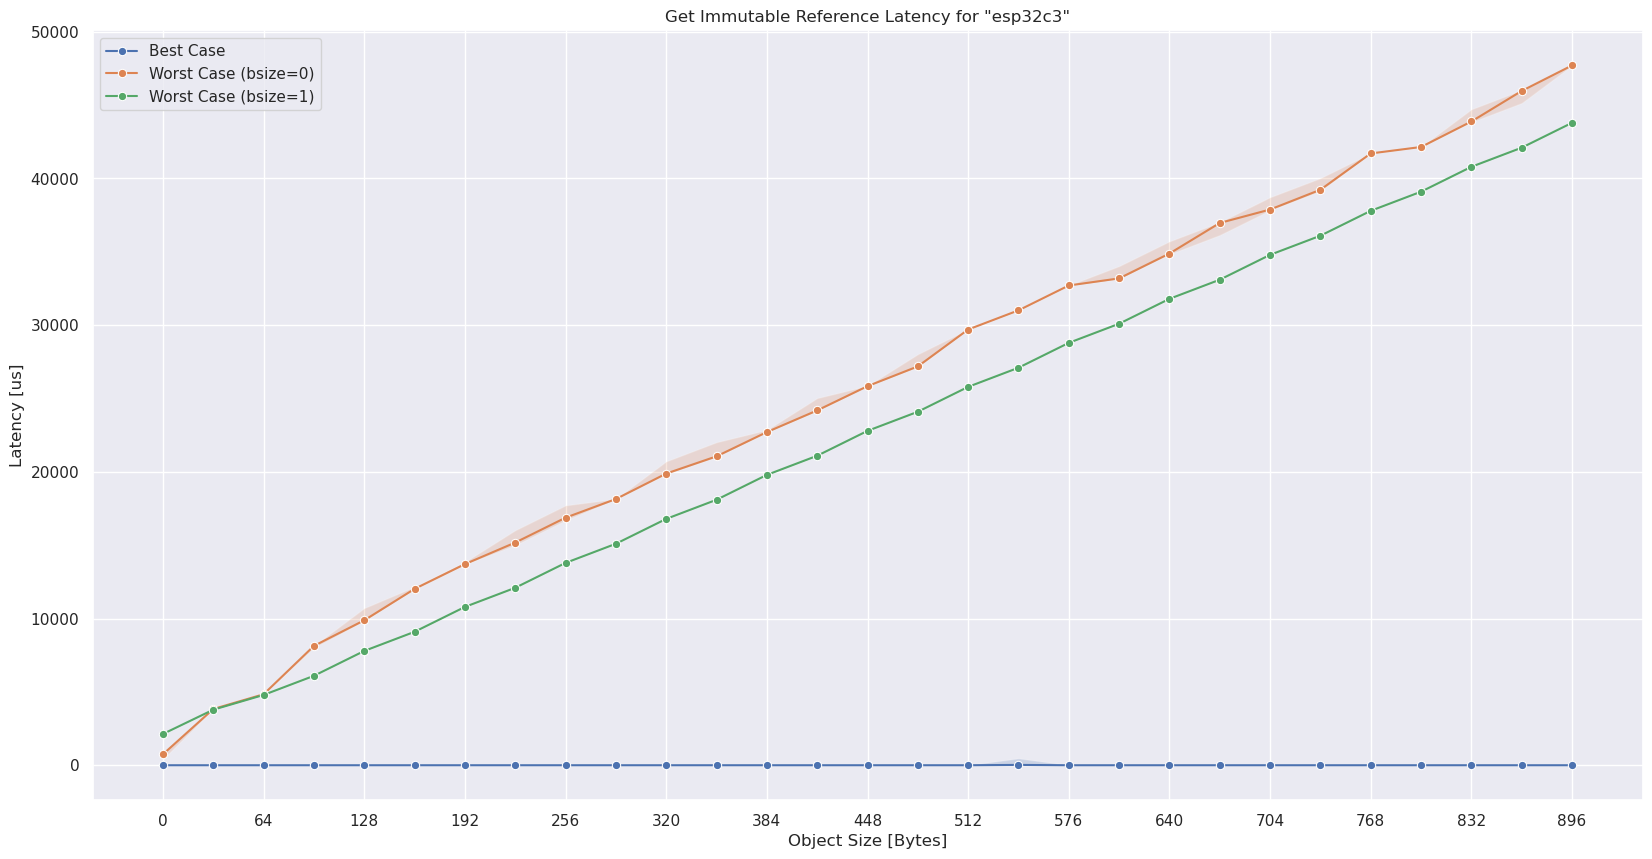

In [5]:
from util.plot import set_grid
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)

if len(get_min) != 0:
    sns.lineplot(ax=ax, data=get_min, x="options.object_size", y="mean", label="Best Case", markers=["o"], marker="o")
    ax.fill_between(get_min["options.object_size"], get_min["min"], get_min["max"], alpha=0.2, **fill_between_args)

if len(get_max1) != 0:
    for value in get_max1["options.blocker_size"].unique():
        data = get_max1.loc[get_max1["options.blocker_size"] == value]
        sns.lineplot(ax=ax, data=data, x="options.object_size", y="mean", label="Worst Case (bsize=" + str(value) + ")", markers=["o"], marker="o")
        ax.fill_between(data["options.object_size"], data["min"], data["max"], alpha=0.2, **fill_between_args)

set_grid(64, max(get_min["options.object_size"].max(), get_max1["options.object_size"].max(), get_max2["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel("Latency [us]")
ax.set_title("Get Immutable Reference Latency for \"" + get_min["machine_name"][0] + "\"")

Text(0.5, 1.0, 'Get Immutable Reference Latency for "esp32c3"')

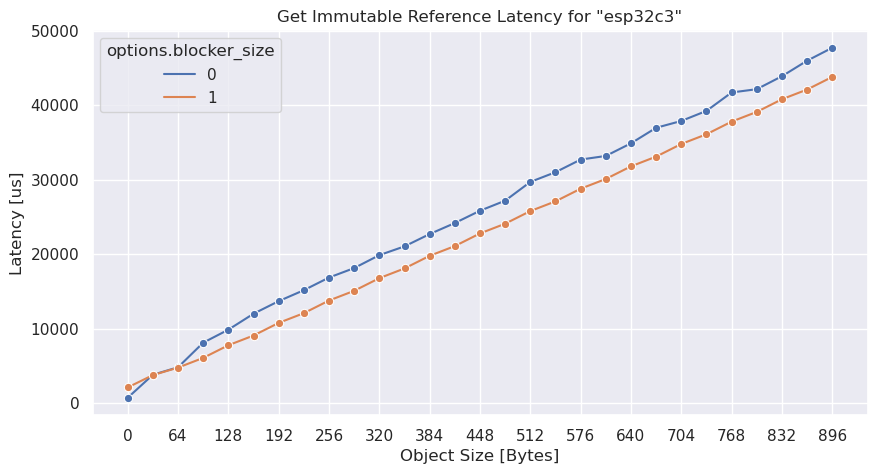

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

SELECTED_BLOCKER_SIZE = [0, 16, 96, 192, 240, 304]

sns.set_theme()

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

if len(get_max1) != 0:
    cnt = len(get_max1["options.object_size"].unique())
    sns.lineplot(ax=ax, data=get_max1, x="options.object_size", y="mean", marker="o", hue="options.blocker_size")

set_grid(64, max(get_min["options.object_size"].max(), get_max1["options.object_size"].max(), get_max2["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel("Latency [us]")
ax.set_title("Get Immutable Reference Latency for \"" + get_min["machine_name"][0] + "\"")

Text(0.5, 1.0, 'Get Immutable Reference Latency for "esp32c3"')

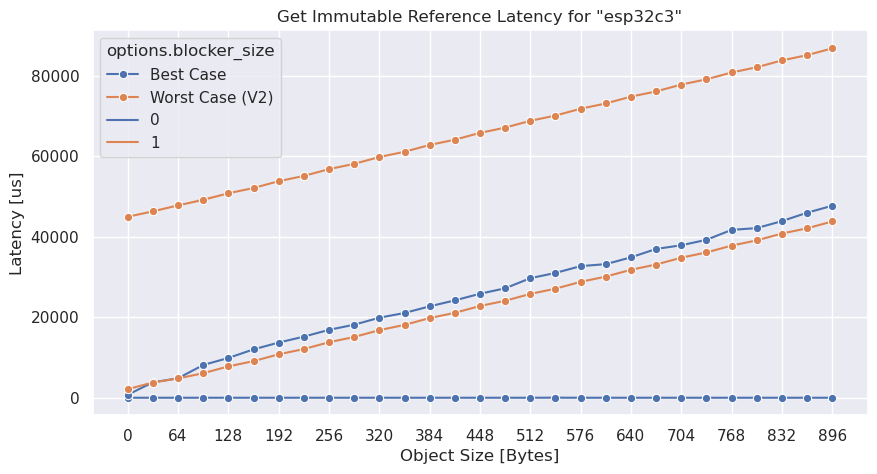

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

SELECTED_BLOCKER_SIZE = [0, 16, 96, 192, 240, 304]

sns.set_theme()

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

if len(get_min) != 0:
    sns.lineplot(ax=ax, data=get_min, x="options.object_size", y="mean", label="Best Case", markers=["o"], marker="o")
    ax.fill_between(get_min["options.object_size"], get_min["min"], get_min["max"], alpha=0.2, **fill_between_args)

if len(get_max2) != 0:
    sns.lineplot(ax=ax, data=get_max2, x="options.object_size", y="mean", label="Worst Case (V2)", markers=["o"], marker="o")
    ax.fill_between(get_max2["options.object_size"], get_max2["min"], get_max2["max"], alpha=0.2, **fill_between_args)

if len(get_max1) != 0:
    cnt = len(get_max1["options.object_size"].unique())
    sns.lineplot(ax=ax, data=get_max1, x="options.object_size", y="mean", marker="o", hue="options.blocker_size")

set_grid(64, max(get_min["options.object_size"].max(), get_max1["options.object_size"].max(), get_max2["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel("Latency [us]")
ax.set_title("Get Immutable Reference Latency for \"" + get_min["machine_name"][0] + "\"")

Text(0.5, 1.0, 'Get Immutable Reference Latency for "esp32c3"')

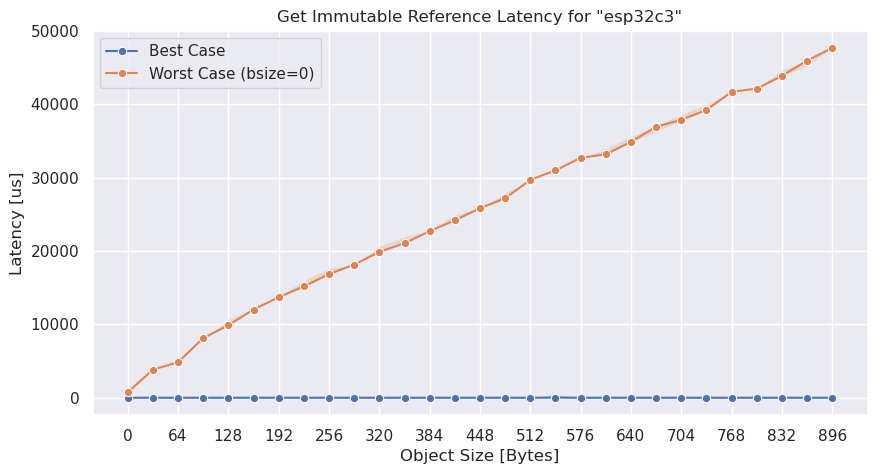

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

SELECTED_BLOCKER_SIZE = [0, 16, 96, 192, 240, 304]

sns.set_theme()

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

if len(get_min) != 0:
    sns.lineplot(ax=ax, data=get_min, x="options.object_size", y="mean", label="Best Case", markers=["o"], marker="o")
    ax.fill_between(get_min["options.object_size"], get_min["min"], get_min["max"], alpha=0.2, **fill_between_args)

if len(get_max1) != 0:
    for value in get_max1["options.blocker_size"].unique():
        if len(SELECTED_BLOCKER_SIZE) != 0 and value not in SELECTED_BLOCKER_SIZE:
            continue

        data = get_max1.loc[get_max1["options.blocker_size"] == value]
        sns.lineplot(ax=ax, data=data, x="options.object_size", y="mean", label="Worst Case (bsize=" + str(value) + ")", markers=["o"], marker="o")
        ax.fill_between(data["options.object_size"], data["min"], data["max"], alpha=0.2, **fill_between_args)

set_grid(64, max(get_min["options.object_size"].max(), get_max1["options.object_size"].max(), get_max2["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel("Latency [us]")
ax.set_title("Get Immutable Reference Latency for \"" + get_min["machine_name"][0] + "\"")

Text(0.5, 1.0, 'Get Immutable Reference Latency for "esp32c3"')

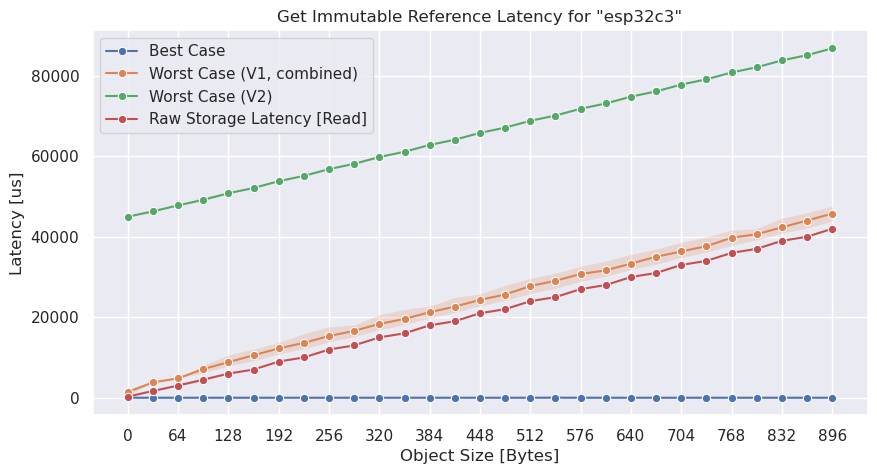

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

if len(get_min) != 0:
    sns.lineplot(ax=ax, data=get_min, x="options.object_size", y="mean", label="Best Case", markers=["o"], marker="o")
    ax.fill_between(get_min["options.object_size"], get_min["min"], get_min["max"], alpha=0.2, **fill_between_args)

if len(get_max1) != 0:
    data = get_max1.groupby("options.object_size").agg({"mean": "mean", "max": "max", "min": "min"})
    sns.lineplot(ax=ax, data=data, x="options.object_size", y="mean", label="Worst Case (V1, combined)", markers=["o"], marker="o")
    ax.fill_between(data.index, data["min"], data["max"], alpha=0.2, **fill_between_args)

if len(get_max2) != 0:
    sns.lineplot(ax=ax, data=get_max2, x="options.object_size", y="mean", label="Worst Case (V2)", markers=["o"], marker="o")
    ax.fill_between(get_max2["options.object_size"], get_max2["min"], get_max2["max"], alpha=0.2, **fill_between_args)

if len(storage_read) != 0:
    sns.lineplot(ax=ax, data=storage_read, x="options.object_size", y="mean", label="Raw Storage Latency [Read]", markers=["o"], marker="o")
    ax.fill_between(storage_read["options.object_size"], storage_read["min"], storage_read["max"], alpha=0.2, **fill_between_args)

set_grid(64, max(get_min["options.object_size"].max(), get_max1["options.object_size"].max(), get_max2["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel("Latency [us]")
ax.set_title("Get Immutable Reference Latency for \"" + get_min["machine_name"][0] + "\"")